## Check Request Response For API link

In [81]:
import re
import requests
import json
import pprint
import matplotlib.pyplot as plt
import pandas as pd 

url = "https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/er-eeri-daily"

res = requests.get(url) #200 means success

print(res)

<Response [200]>


## Apply Json method to parse valid Json string and convert to a Python dictionary

In [82]:
import json
answer = json.loads(res.text)   # json.loads() method can be used to parse a valid JSON string and convert it into a Python Dictionary
answer

{'header': {'success': True, 'err_code': '0000', 'err_msg': 'No error found'},
 'result': {'datasize': 100,
  'records': [{'end_of_day': '2022-09-30',
    'usd': 7.851,
    'gbp': 8.7485,
    'jpy': 0.054365,
    'cad': 5.7335,
    'aud': 5.098,
    'sgd': 5.4845,
    'twd': 0.2475,
    'chf': 8.04,
    'cny': 1.10665,
    'krw': 0.005482,
    'thb': 0.20775,
    'myr': 1.69285,
    'dem': None,
    'nlg': None,
    'bef': None,
    'frf': None,
    'itl': None,
    'eur': 7.7005,
    'php': 0.1335,
    'inr': 0.0965,
    'idr': 0.00051535,
    'zar': 0.438,
    'special_drawing_rights': 10.04833788,
    'neeri_1983_trade_wgt': None,
    'neeri_1983_import_wgt': None,
    'neeri_1983_export_wgt': None,
    'neeri_2000_trade_wgt': None,
    'neeri_2000_import_wgt': None,
    'neeri_2000_export_wgt': None,
    'neeri_2010_trade_wgt': None,
    'neeri_2010_import_wgt': None,
    'neeri_2010_export_wgt': None,
    'neeri_2020_trade_wgt': 105.3,
    'neeri_2020_import_wgt': 106.4,
    'neer

## Filtered to useful dataset

In [83]:
list_dict = answer['result']['records']   # only require specify key-value information
list_dict

[{'end_of_day': '2022-09-30',
  'usd': 7.851,
  'gbp': 8.7485,
  'jpy': 0.054365,
  'cad': 5.7335,
  'aud': 5.098,
  'sgd': 5.4845,
  'twd': 0.2475,
  'chf': 8.04,
  'cny': 1.10665,
  'krw': 0.005482,
  'thb': 0.20775,
  'myr': 1.69285,
  'dem': None,
  'nlg': None,
  'bef': None,
  'frf': None,
  'itl': None,
  'eur': 7.7005,
  'php': 0.1335,
  'inr': 0.0965,
  'idr': 0.00051535,
  'zar': 0.438,
  'special_drawing_rights': 10.04833788,
  'neeri_1983_trade_wgt': None,
  'neeri_1983_import_wgt': None,
  'neeri_1983_export_wgt': None,
  'neeri_2000_trade_wgt': None,
  'neeri_2000_import_wgt': None,
  'neeri_2000_export_wgt': None,
  'neeri_2010_trade_wgt': None,
  'neeri_2010_import_wgt': None,
  'neeri_2010_export_wgt': None,
  'neeri_2020_trade_wgt': 105.3,
  'neeri_2020_import_wgt': 106.4,
  'neeri_2020_export_wgt': 104.2},
 {'end_of_day': '2022-09-29',
  'usd': 7.851,
  'gbp': 8.4655,
  'jpy': 0.05422,
  'cad': 5.7195,
  'aud': 5.068,
  'sgd': 5.4465,
  'twd': 0.247,
  'chf': 7.979,


## Build up Python Dictionary by list comprehension to prepare for creating DataFrame

In [84]:
d = {'end_of_day': [item['end_of_day'] for item in list_dict],   #Create dictionary by list comprehension
  'usd': [item['usd'] for item in list_dict],
  'gbp': [item['gbp'] for item in list_dict],
  'jpy': [item['jpy'] for item in list_dict],
  'cad': [item['cad'] for item in list_dict],
  'aud': [item['aud'] for item in list_dict],
  'sgd': [item['sgd'] for item in list_dict],
  'twd': [item['twd'] for item in list_dict],
  'chf': [item['chf'] for item in list_dict],
  'cny': [item['cny'] for item in list_dict],
  'krw': [item['krw'] for item in list_dict],
  'thb': [item['thb'] for item in list_dict],
  'myr': [item['myr'] for item in list_dict],
  'dem': [item['dem'] for item in list_dict],
  'nlg': [item['nlg'] for item in list_dict],
  'bef': [item['bef'] for item in list_dict],
  'frf': [item['frf'] for item in list_dict],
  'itl': [item['itl'] for item in list_dict],
  'eur': [item['eur'] for item in list_dict],
  'php': [item['php'] for item in list_dict],
  'inr': [item['inr'] for item in list_dict],
  'idr': [item['idr'] for item in list_dict],
  'zar': [item['zar'] for item in list_dict],
  'special_drawing_rights': [item['special_drawing_rights'] for item in list_dict],
  'neeri_1983_trade_wgt': [item['neeri_1983_trade_wgt'] for item in list_dict],
  'neeri_1983_import_wgt': [item['neeri_1983_import_wgt'] for item in list_dict],
  'neeri_1983_export_wgt': [item['neeri_1983_export_wgt'] for item in list_dict],
  'neeri_2000_trade_wgt': [item['neeri_2000_trade_wgt'] for item in list_dict]  ,   
  'neeri_2000_import_wgt': [item['neeri_2000_import_wgt'] for item in list_dict],
  'neeri_2000_export_wgt': [item['neeri_2000_export_wgt'] for item in list_dict] ,    
  'neeri_2010_trade_wgt': [item['neeri_2010_trade_wgt'] for item in list_dict]    , 
  'neeri_2010_import_wgt': [item['neeri_2010_import_wgt'] for item in list_dict]   ,  
  'neeri_2010_export_wgt': [item['neeri_2010_export_wgt'] for item in list_dict],
  'neeri_2020_trade_wgt': [item['neeri_2020_trade_wgt'] for item in list_dict]   ,  
  'neeri_2020_import_wgt': [item['neeri_2020_import_wgt'] for item in list_dict] ,
  'neeri_2020_export_wgt': [item['neeri_2020_export_wgt'] for item in list_dict]       
}

In [85]:
type(d)   

dict

## Create Dataframe by Pandas library

In [86]:
import pandas as pd        #use dictionary to create dataframe by pandas

df = pd.DataFrame(d)
df

,end_of_day,usd,gbp,jpy,cad,aud,sgd,twd,chf,cny,...,neeri_1983_export_wgt,neeri_2000_trade_wgt,neeri_2000_import_wgt,neeri_2000_export_wgt,neeri_2010_trade_wgt,neeri_2010_import_wgt,neeri_2010_export_wgt,neeri_2020_trade_wgt,neeri_2020_import_wgt,neeri_2020_export_wgt
0,2022-09-30,7.851,8.7485,0.054365,5.7335,5.098,5.4845,0.2475,8.0400,1.10665,...,None,None,None,None,None,None,None,105.3,106.4,104.2
1,2022-09-29,7.851,8.4655,0.054220,5.7195,5.068,5.4465,0.2470,7.9790,1.08920,...,None,None,None,None,None,None,None,106.5,107.5,105.4
2,2022-09-28,7.851,8.3565,0.054215,5.6910,4.998,5.4240,0.2470,7.8865,1.08415,...,None,None,None,None,None,None,None,106.9,107.9,105.9
3,2022-09-27,7.851,8.4655,0.054385,5.7455,5.100,5.4705,0.2465,7.9475,1.09720,...,None,None,None,None,None,None,None,106.0,106.9,104.9
4,2022-09-26,7.851,8.3785,0.054555,5.7650,5.101,5.4735,0.2512,7.9705,1.09675,...,None,None,None,None,None,None,None,105.9,106.8,104.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-06-08,7.848,9.8610,0.058850,6.2555,5.647,5.7100,0.2672,8.0570,1.17535,...,None,None,None,None,None,None,None,99.1,99.8,98.4
96,2022-06-07,7.847,9.7830,0.059080,6.2265,5.644,5.6980,0.2672,8.0580,1.17595,...,None,None,None,None,None,None,None,99.1,99.8,98.3
97,2022-06-06,7.847,9.8370,0.060095,6.2395,5.656,5.7120,0.2672,8.1625,1.17875,...,None,None,None,None,None,None,None,98.8,99.5,98.1
98,2022-06-04,7.846,9.8070,0.059980,6.2320,5.657,5.7020,0.2682,8.1555,1.17845,...,None,None,None,None,None,None,None,98.9,99.5,98.1


## Inspect and Clean Data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   end_of_day              100 non-null    object 
 1   usd                     100 non-null    float64
 2   gbp                     100 non-null    float64
 3   jpy                     100 non-null    float64
 4   cad                     100 non-null    float64
 5   aud                     100 non-null    float64
 6   sgd                     100 non-null    float64
 7   twd                     100 non-null    float64
 8   chf                     100 non-null    float64
 9   cny                     100 non-null    float64
 10  krw                     100 non-null    float64
 11  thb                     100 non-null    float64
 12  myr                     100 non-null    float64
 13  dem                     0 non-null      object 
 14  nlg                     0 non-null      obj

In [88]:
df['end_of_day'] = pd.to_datetime(df['end_of_day'])  # changed the data type from string to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   end_of_day              100 non-null    datetime64[ns]
 1   usd                     100 non-null    float64       
 2   gbp                     100 non-null    float64       
 3   jpy                     100 non-null    float64       
 4   cad                     100 non-null    float64       
 5   aud                     100 non-null    float64       
 6   sgd                     100 non-null    float64       
 7   twd                     100 non-null    float64       
 8   chf                     100 non-null    float64       
 9   cny                     100 non-null    float64       
 10  krw                     100 non-null    float64       
 11  thb                     100 non-null    float64       
 12  myr                     100 non-null    float64    

In [89]:
df.sort_values(by='end_of_day', ascending=True, inplace=True)
df

,end_of_day,usd,gbp,jpy,cad,aud,sgd,twd,chf,cny,...,neeri_1983_export_wgt,neeri_2000_trade_wgt,neeri_2000_import_wgt,neeri_2000_export_wgt,neeri_2010_trade_wgt,neeri_2010_import_wgt,neeri_2010_export_wgt,neeri_2020_trade_wgt,neeri_2020_import_wgt,neeri_2020_export_wgt
99,2022-06-02,7.847,9.8250,0.060425,6.1990,5.634,5.7075,0.2682,8.1910,1.17450,...,None,None,None,None,None,None,None,99.0,99.6,98.3
98,2022-06-04,7.846,9.8070,0.059980,6.2320,5.657,5.7020,0.2682,8.1555,1.17845,...,None,None,None,None,None,None,None,98.9,99.5,98.1
97,2022-06-06,7.847,9.8370,0.060095,6.2395,5.656,5.7120,0.2672,8.1625,1.17875,...,None,None,None,None,None,None,None,98.8,99.5,98.1
96,2022-06-07,7.847,9.7830,0.059080,6.2265,5.644,5.6980,0.2672,8.0580,1.17595,...,None,None,None,None,None,None,None,99.1,99.8,98.3
95,2022-06-08,7.848,9.8610,0.058850,6.2555,5.647,5.7100,0.2672,8.0570,1.17535,...,None,None,None,None,None,None,None,99.1,99.8,98.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-09-26,7.851,8.3785,0.054555,5.7650,5.101,5.4735,0.2512,7.9705,1.09675,...,None,None,None,None,None,None,None,105.9,106.8,104.9
3,2022-09-27,7.851,8.4655,0.054385,5.7455,5.100,5.4705,0.2465,7.9475,1.09720,...,None,None,None,None,None,None,None,106.0,106.9,104.9
2,2022-09-28,7.851,8.3565,0.054215,5.6910,4.998,5.4240,0.2470,7.8865,1.08415,...,None,None,None,None,None,None,None,106.9,107.9,105.9
1,2022-09-29,7.851,8.4655,0.054220,5.7195,5.068,5.4465,0.2470,7.9790,1.08920,...,None,None,None,None,None,None,None,106.5,107.5,105.4


In [90]:
df.isna()      #check any null values

,end_of_day,usd,gbp,jpy,cad,aud,sgd,twd,chf,cny,...,neeri_1983_export_wgt,neeri_2000_trade_wgt,neeri_2000_import_wgt,neeri_2000_export_wgt,neeri_2010_trade_wgt,neeri_2010_import_wgt,neeri_2010_export_wgt,neeri_2020_trade_wgt,neeri_2020_import_wgt,neeri_2020_export_wgt
99,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
95,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [91]:
df.to_csv('HongKongDollar_ExchangeRate_ForeignCurrencies.csv')

## Investigate insights

In [92]:
date = list(df['end_of_day']) # or use df['end_of_day'].iloc[:]
date

[Timestamp('2022-06-02 00:00:00'),
 Timestamp('2022-06-04 00:00:00'),
 Timestamp('2022-06-06 00:00:00'),
 Timestamp('2022-06-07 00:00:00'),
 Timestamp('2022-06-08 00:00:00'),
 Timestamp('2022-06-09 00:00:00'),
 Timestamp('2022-06-10 00:00:00'),
 Timestamp('2022-06-11 00:00:00'),
 Timestamp('2022-06-13 00:00:00'),
 Timestamp('2022-06-14 00:00:00'),
 Timestamp('2022-06-15 00:00:00'),
 Timestamp('2022-06-16 00:00:00'),
 Timestamp('2022-06-17 00:00:00'),
 Timestamp('2022-06-18 00:00:00'),
 Timestamp('2022-06-20 00:00:00'),
 Timestamp('2022-06-21 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-06-23 00:00:00'),
 Timestamp('2022-06-24 00:00:00'),
 Timestamp('2022-06-25 00:00:00'),
 Timestamp('2022-06-27 00:00:00'),
 Timestamp('2022-06-28 00:00:00'),
 Timestamp('2022-06-29 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-07-06 00:00:00'),
 Timestamp('2022-07-07 00:00:00'),
 Timestamp('2022-07-

In [93]:
type(df['usd'].iloc[:])

pandas.core.series.Series

In [94]:
usd = df['usd'].iloc[:]    # or  usd = list( df['usd'])
gbp = df['gbp'].iloc[:]
cad = df['cad'].iloc[:]
cny = df['cny'].iloc[:]
aud = df['aud'].iloc[:]

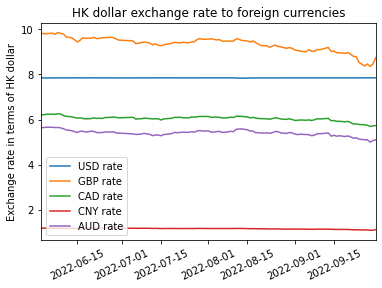

In [95]:
plt.plot(date, usd)
plt.plot(date, gbp)
plt.plot(date, cad)
plt.plot(date, cny)
plt.plot(date, aud)
plt.legend(['USD rate', 'GBP rate' , 'CAD rate', 'CNY rate', 'AUD rate'])
plt.title('HK dollar exchange rate to foreign currencies')
plt.xticks(rotation = 25)
plt.xlim(date[0],date[-1])
plt.ylabel('Exchange rate in terms of HK dollar')
plt.savefig('Exchange Rate HK dollar to Foreign Currencies.png')
plt.show()

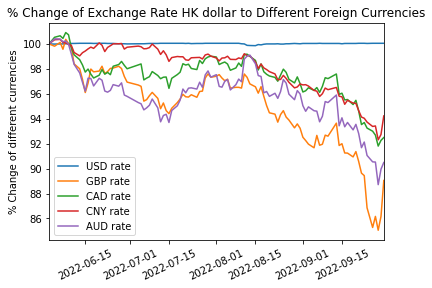

In [96]:
plt.plot(date, usd/usd.iloc[0]*100)
plt.plot(date, gbp/gbp.iloc[0]*100)
plt.plot(date, cad/cad.iloc[0]*100)
plt.plot(date, cny/cny.iloc[0]*100)
plt.plot(date, aud/aud.iloc[0]*100)
plt.title('% Change of Exchange Rate HK dollar to Different Foreign Currencies')
plt.legend(['USD rate', 'GBP rate' , 'CAD rate', 'CNY rate', 'AUD rate'])
plt.xticks(rotation = 25)
plt.xlim(date[0],date[-1])
plt.ylabel('% Change of different currencies')
plt.savefig('Percentage Change of Exchange Rate HK dollar to Foreign Currencies.png')
plt.savefig('Percentage Change of Exchange Rate HK dollar to Foreign Currencies.pdf')
plt.show()